# Telecom churn case study
## Business problem
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


%matplotlib inline

In [2]:
#importing Telecom churn dataset

data=pd.read_csv('C://Users//mohit//Downloads//Mohit Data Science//Case sudy Telecom//telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

### Data Cleaning

In [3]:
#check missing percentage
percent_missing = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
dtype: float64

#### Investigating columns with high missing values :

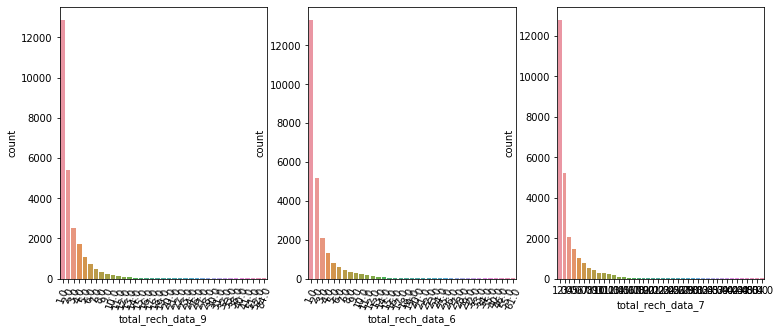

In [4]:
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='total_rech_data_9',data=data)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='total_rech_data_6',data=data)
plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.countplot(x='total_rech_data_7',data=data)

In [5]:
#Imputing missing values with 0

data['total_rech_data_9']=data['total_rech_data_9'].fillna(0)
data['total_rech_data_9']=data['total_rech_data_9'].fillna(0)
data['total_rech_data_6']=data['total_rech_data_6'].fillna(0)
data['total_rech_data_7']=data['total_rech_data_7'].fillna(0)




In [6]:
#Removing columns with missing percentage more than 50% as wrond imputation will result in biasing which will also effect the model performance
data.drop(['count_rech_3g_6','fb_user_9','arpu_2g_9','max_rech_data_9','arpu_3g_9','total_rech_data_9','av_rech_amt_data_9','count_rech_3g_9','count_rech_2g_9','fb_user_8','av_rech_amt_data_7','max_rech_data_7','night_pck_user_7','total_rech_data_7','date_of_last_rech_data_7','night_pck_user_9','date_of_last_rech_data_9','av_rech_amt_data_8','count_rech_3g_8','count_rech_2g_8','date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','arpu_3g_8','arpu_2g_8','night_pck_user_8','count_rech_2g_6','date_of_last_rech_data_6','av_rech_amt_data_6','max_rech_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6','night_pck_user_6','fb_user_6','arpu_3g_7','count_rech_2g_7','fb_user_7','count_rech_3g_7','arpu_2g_7'],inplace=True,axis=1)


In [7]:
#removing date related columns as it won't be of any use

data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1,inplace=True)

In [8]:
# for columns with missing percentage 1-10% we can use fancy impute , so applying same for rest of the columns 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_columns=data.columns

Ii=IterativeImputer(min_value=0)
data2=pd.DataFrame(Ii.fit_transform(data))
data2.columns=data_columns
data2.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,138.796257,146.191968,0.00,140.284168,194.584797,185.882543,0.00,181.640166,134.931247,126.075545,0.00,123.153915,272.913998,261.608912,0.00,263.194531,47.100716,39.586374,0.00,37.95025,4.237074,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.542741,0.00,0.00,0.383028,50.070227,41.714172,0.00,38.683738,79.829327,82.666005,0.00,79.532442,7.381983,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,82.763856,79.235695,0.00,77.406563,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,47.922531,47.991152,0.16,46.289605,66.597893,69.762996,4.13,69.370838,0.00,0.00,1.15,0.00,98.016243,99.733345,5.44,98.65715,9.575939,10.012161,0.00,9.431833,6.74289,7.924708,0.00,5.202899,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58
1,7.001866e+09,109.0,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.560000,7.68,18.34000,11.510000,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.000000,2.91,0.00,0.000000,35.390000,150.5

In [9]:
#check missing percentage
percent_missing = (data2.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(5)

sep_vbc_3g      0.0
loc_og_mou_9    0.0
std_og_mou_9    0.0
std_og_mou_8    0.0
std_og_mou_7    0.0
dtype: float64

#### There are no missing values present in Dataset now

In [10]:
# Removing columns which have just 1 unique value 

col_drop=data2.loc[:,data2.apply(pd.Series.nunique)==1]
col_drop.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data2.drop(col_drop.columns,axis=1,inplace=True)

In [12]:
data2.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7.000843e+09,197.385,214.816,213.803,21.100,138.796257,146.191968,0.00,140.284168,194.584797,185.882543,0.00,181.640166,134.931247,126.075545,0.00,123.153915,272.913998,261.608912,0.00,263.194531,47.100716,39.586374,0.00,37.95025,4.237074,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.542741,0.00,0.00,0.383028,50.070227,41.714172,0.00,38.683738,79.829327,82.666005,0.00,79.532442,7.381983,0.00,0.00,0.00,0.00,0.00,0.00,0.0,82.763856,79.235695,0.00,77.406563,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,47.922531,47.991152,0.16,46.289605,66.597893,69.762996,4.13,69.370838,0.00,0.00,1.15,0.00,98.016243,99.733345,5.44,98.65715,9.575939,10.012161,0.00,9.431833,6.74289,7.924708,0.00,5.202899,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58
1,7.001866e+09,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,23.880000,74.560000,7.68,18.34000,11.510000,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.000000,2.91,0.00,0.000000,35.390000,150.510000,299.54,72.110000,0.230000,4.110000,0.00,0.000000,0.000000,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.230000,4.580000,0.13,0.000000,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.610000,29.910000,29.23,116.090000,17.480000,65

### Finding HIGH VALUE CUSTOMERS based on good phase data i.e. June and July

In [13]:
#Deriving newcolumn with average of total recharge amount in june and july

data2['avg_rech_6_7']=(data2['total_rech_amt_6']+data2['total_rech_amt_7'])/2
data2['avg_rech_6_7'].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_rech_6_7, dtype: float64

In [14]:
#Let's find out the 70th percent of avg_rech_6_7
avg_70_6_7 = np.percentile(data2['avg_rech_6_7'], 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', avg_70_6_7)


70 percentile of 6th and 7th months avg recharge amount:  368.5


In [15]:
#Trimming dataset with entries of customer whose average is => 737 those will be high value customer

data_hvc = data2[data2['avg_rech_6_7']>= avg_70_6_7]
print('Dataframe Shape after filtering HIgh Value Customers: ', data_hvc.shape)

Dataframe Shape after filtering HIgh Value Customers:  (30011, 167)


In [16]:
#Checking and dropping the highly correlated variables

corr_mat=data_hvc.corr()
corr=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
corr=corr.abs().unstack().reset_index()
corr.columns=['VAR1','VAR2','CORR']
corr.dropna(subset=['CORR'],inplace=True)
corr.sort_values(['CORR'],ascending=False,axis=0,inplace=True)
corr.head(20)

,VAR1,VAR2,CORR
21212,total_rech_amt_8,arpu_8,0.953725
21380,total_rech_amt_9,arpu_9,0.947383
9911,isd_og_mou_8,isd_og_mou_7,0.941347
20876,total_rech_amt_6,arpu_6,0.941256
21044,total_rech_amt_7,arpu_7,0.937114
9910,isd_og_mou_8,isd_og_mou_6,0.916058
9743,isd_og_mou_7,isd_og_mou_6,0.914963
18124,total_ic_mou_9,loc_ic_mou_9,0.894950
17620,total_ic_mou_6,loc_ic_mou_6,0.894661
27848,avg_rech_6_7,total_rech_amt_7,0.892365


In [17]:
drop_corr=['arpu_8','arpu_9','isd_og_mou_7','arpu_6','arpu_7','og_others_9','isd_og_mou_6','og_others_8','loc_ic_mou_6','total_rech_amt_7','loc_ic_mou_9','isd_og_mou_8','loc_ic_mou_8','total_rech_amt_6','mobile_number','loc_ic_mou_7','isd_og_mou_7','isd_og_mou_7','onnet_mou_8']
data_hvc.drop(drop_corr,axis=1,inplace=True)

In [18]:
data_hvc.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,57.84,54.68,139.771945,453.43,567.16,325.91,180.201148,16.23,33.49,31.64,137.612958,23.74,12.59,38.06,260.089392,51.39,31.38,40.28,37.949074,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,38.685385,4.30,23.29,12.01,79.534053,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,77.410146,0.0,4.50,0.00,6.50,0.00,0.00,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.289478,217.56,221.49,121.19,69.365727,152.16,101.46,39.53,0.00,36.89,11.83,30.39,9.431899,91.44,126.99,141.33,5.196231,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0
8,413.69,351.03,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.710000,116.56,133.43,22.58,7.330000,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.460000,0.0,0.00,0.00,10.23,0.00,0.00,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.030000,57.58,13.98,15.48,17.340000,0.00,0.00,0.00,0.00,0.00,0.58,0.10,0.000000,22.43,4.08,0.65,13.530000,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,15.0,120.0,186.0,90.0,154.0,30.0,36.0,50.0,0.0,10.0,0.0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,519.0
13,501.76,108.39,244.810000,413.31,119.28,482.46,214.060000,23.53,144.24,72.11

#### Treating Outliers


In [19]:
Q1 = data_hvc.quantile(0.01)
Q3 = data_hvc.quantile(0.99)
IQR = Q3 - Q1
data_hvc = data_hvc[(data_hvc >= Q1 - 1.5*IQR) & (data_hvc <= Q3 + 1.5*IQR)]


In [20]:
data_hvc=data_hvc.dropna()
data_hvc.shape

(27259, 150)

In [21]:
# all columns related to 9th month
cols_9 = [col for col in data_hvc.columns if '_9' in col]
print(cols_9)


['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


### Deriving churn based on 9th month data i.e.
- if Sum of Calling min(og and ic) and Data Usage(2g and 3g)= 0 means Customer Churned
- Columns required - total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,total_ic_mou_9

In [22]:
data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0
21,252.61,1031.53,0.0,0.0


#### Churned Customers

In [23]:
data_hvc['churn'] = np.where(data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0) 

In [24]:
data_hvc['churn'].head()

7     1
8     0
16    0
17    0
21    0
Name: churn, dtype: int32

In [25]:
# Removing all 9th month related columns 

column_9=['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']
data_hvc.drop(column_9,axis=1,inplace=True)

In [26]:
data_hvc.shape

(27259, 114)

In [27]:
# all columns related to 6th month
cols_6 = [col for col in data_hvc.columns if '_6' in col]
print(cols_6)

['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'avg_rech_6_7']


In [28]:
# all columns related to 7th month
cols_7 = [col for col in data_hvc.columns if '_7' in col]
print(cols_7)

['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'avg_rech_6_7']


#### Deriving new columns by taking avgerage of goodphase months(6 and 7) and keeping 8th month columns as it is considering it is part of action phase


In [29]:
data_hvc['avg_std_ic_mou_67']=(data_hvc['std_ic_mou_6']+data_hvc['std_ic_mou_7'])/2
data_hvc['avg_total_ic_mou_67']=(data_hvc['total_ic_mou_6']+data_hvc['total_ic_mou_7'])/2
data_hvc['avg_spl_ic_mou_67']=(data_hvc['spl_ic_mou_6']+data_hvc['spl_ic_mou_7'])/2
data_hvc['avg_isd_ic_mou_67']=(data_hvc['isd_ic_mou_6']+data_hvc['isd_ic_mou_7'])/2
data_hvc['avg_ic_others_67']=(data_hvc['ic_others_6']+data_hvc['ic_others_7'])/2
data_hvc['avg_total_rech_num_67']=(data_hvc['total_rech_num_6']+data_hvc['total_rech_num_7'])/2
data_hvc['avg_max_rech_amt_67']=(data_hvc['max_rech_amt_6']+data_hvc['max_rech_amt_7'])/2
data_hvc['avg_last_day_rch_amt_67']=(data_hvc['last_day_rch_amt_6']+data_hvc['last_day_rch_amt_7'])/2
data_hvc['avg_vol_2g_mb_67']=(data_hvc['vol_2g_mb_6']+data_hvc['vol_2g_mb_7'])/2
data_hvc['avg_vol_3g_mb_67']=(data_hvc['vol_3g_mb_6']+data_hvc['vol_3g_mb_7'])/2
data_hvc['avg_monthly_2g_67']=(data_hvc['monthly_2g_6']+data_hvc['monthly_2g_7'])/2
data_hvc['avg_sachet_2g_67']=(data_hvc['sachet_2g_6']+data_hvc['sachet_2g_7'])/2
data_hvc['avg_monthly_3g_67']=(data_hvc['monthly_3g_6']+data_hvc['monthly_3g_7'])/2
data_hvc['avg_sachet_3g_67']=(data_hvc['sachet_3g_6']+data_hvc['sachet_3g_7'])/2

data_hvc['avgonnet_mou_67']=(data_hvc['onnet_mou_7']+data_hvc['onnet_mou_7'])/2

data_hvc['avg_offnet_mou_67']=(data_hvc['offnet_mou_6']+data_hvc['offnet_mou_7'])/2
data_hvc['avg_roam_ic_mou_67']=(data_hvc['roam_ic_mou_6']+data_hvc['roam_ic_mou_7'])/2
data_hvc['avg_roam_og_mou_67']=(data_hvc['roam_og_mou_6']+data_hvc['roam_og_mou_7'])/2
data_hvc['avg_loc_og_t2t_mou_67']=(data_hvc['loc_og_t2t_mou_6']+data_hvc['loc_og_t2t_mou_7'])/2
data_hvc['avg_loc_og_t2m_mou_67']=(data_hvc['loc_og_t2m_mou_6']+data_hvc['loc_og_t2m_mou_7'])/2
data_hvc['avg_loc_og_t2f_mou_67']=(data_hvc['loc_og_t2f_mou_6']+data_hvc['loc_og_t2f_mou_7'])/2
data_hvc['avg_loc_og_t2c_mou_67']=(data_hvc['loc_og_t2c_mou_6']+data_hvc['loc_og_t2c_mou_7'])/2
data_hvc['avg_std_og_t2t_mou_67']=(data_hvc['std_og_t2t_mou_6']+data_hvc['std_og_t2t_mou_7'])/2
data_hvc['avg_std_og_t2m_mou_67']=(data_hvc['std_og_t2m_mou_6']+data_hvc['std_og_t2m_mou_7'])/2
data_hvc['avg_std_og_t2f_mou_67']=(data_hvc['std_og_t2f_mou_6']+data_hvc['std_og_t2f_mou_7'])/2
data_hvc['avg_std_og_mou_67']=(data_hvc['std_og_mou_6']+data_hvc['std_og_mou_7'])/2
data_hvc['avg_spl_og_mou_67']=(data_hvc['spl_og_mou_6']+data_hvc['spl_og_mou_7'])/2
data_hvc['avg_og_others_67']=(data_hvc['og_others_6']+data_hvc['og_others_7'])/2
data_hvc['avg_total_og_mou_67']=(data_hvc['total_og_mou_6']+data_hvc['total_og_mou_7'])/2
data_hvc['avg_loc_ic_t2t_mou_67']=(data_hvc['loc_ic_t2t_mou_6']+data_hvc['loc_ic_t2t_mou_7'])/2
data_hvc['avg_loc_ic_t2m_mo_67']=(data_hvc['loc_ic_t2m_mou_6']+data_hvc['loc_ic_t2m_mou_7'])/2
data_hvc['avg_loc_ic_t2f_mou_67']=(data_hvc['loc_ic_t2f_mou_6']+data_hvc['loc_ic_t2f_mou_7'])/2
data_hvc['avg_std_ic_t2t_mou_67']=(data_hvc['std_ic_t2t_mou_6']+data_hvc['std_ic_t2t_mou_7'])/2
data_hvc['avg_std_ic_t2m_mou_67']=(data_hvc['std_ic_t2m_mou_6']+data_hvc['std_ic_t2m_mou_7'])/2
data_hvc['avg_std_ic_t2f_mou_67']=(data_hvc['std_ic_t2f_mou_7']+data_hvc['std_ic_t2f_mou_7'])/2
data_hvc['avg_vbc_3g_67']=(data_hvc['jul_vbc_3g']+data_hvc['jun_vbc_3g'])/2

data_hvc.rename(columns={'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [30]:
#Conevrt AON in Months
data_hvc['aon_mon'] = data_hvc['aon']/30
data_hvc.drop('aon', axis=1, inplace=True)
data_hvc['aon_mon'].head()

7     26.733333
8     10.500000
16    17.033333
17    22.233333
21    24.000000
Name: aon_mon, dtype: float64

In [31]:
data_hvc.shape

(27259, 150)

In [32]:
data_hvc.columns

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7',
       ...
       'avg_og_others_67', 'avg_total_og_mou_67', 'avg_loc_ic_t2t_mou_67',
       'avg_loc_ic_t2m_mo_67', 'avg_loc_ic_t2f_mou_67',
       'avg_std_ic_t2t_mou_67', 'avg_std_ic_t2m_mou_67',
       'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67', 'aon_mon'],
      dtype='object', length=150)

In [33]:
data_hvc.drop(['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6','onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7', 'monthly_3g_7', 'sachet_3g_7' ],axis=1,inplace=True)

### EDA

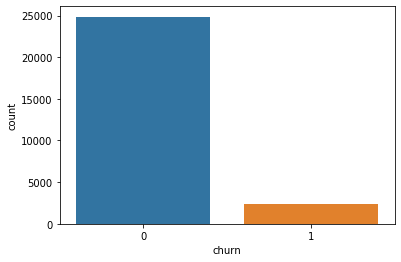

In [34]:
#Churn 
sns.countplot(data_hvc['churn'])

In [35]:
data_hvc['churn'].value_counts()/data_hvc.shape[0]


0    0.911956
1    0.088044
Name: churn, dtype: float64

### As we can see Data is highly imbalanced , imbalance percentage for target 0 and 1 is 91% and 8%
#### 8% out of total customers are likely to churn.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

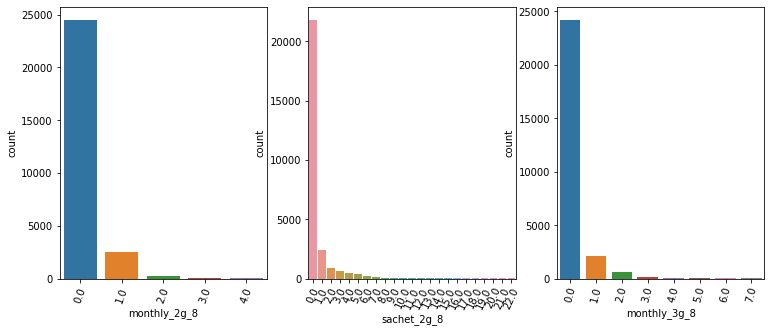

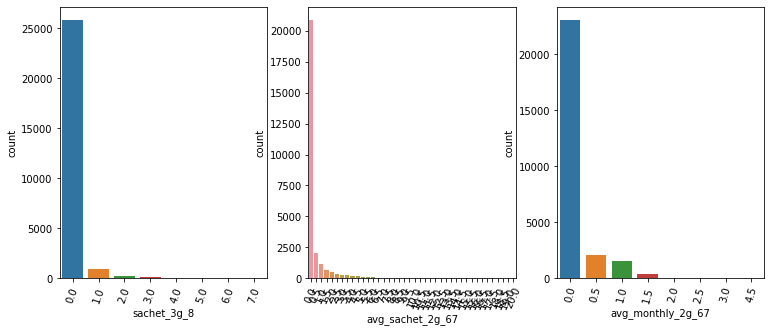

In [36]:
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='monthly_2g_8',data=data_hvc)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='sachet_2g_8',data=data_hvc)
plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.countplot(x='monthly_3g_8',data=data_hvc)
plt.xticks(rotation=75)
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.countplot(x='sachet_3g_8',data=data_hvc)
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.countplot(x='avg_sachet_2g_67',data=data_hvc)
plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.countplot(x='avg_monthly_2g_67',data=data_hvc)
plt.xticks(rotation=75)

#### Tenure vs Churn 

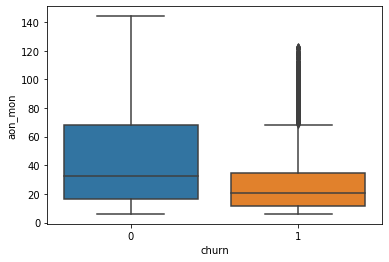

In [37]:
sns.boxplot(x=data_hvc['churn'],y=data_hvc['aon_mon'])

#### We can say that customer who ranges between 10-20 months with us are more likely to churn

#### let's compare histogram of important variables of avg_67 columns with 8th month columns 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C98C946710>,
      dtype=object)

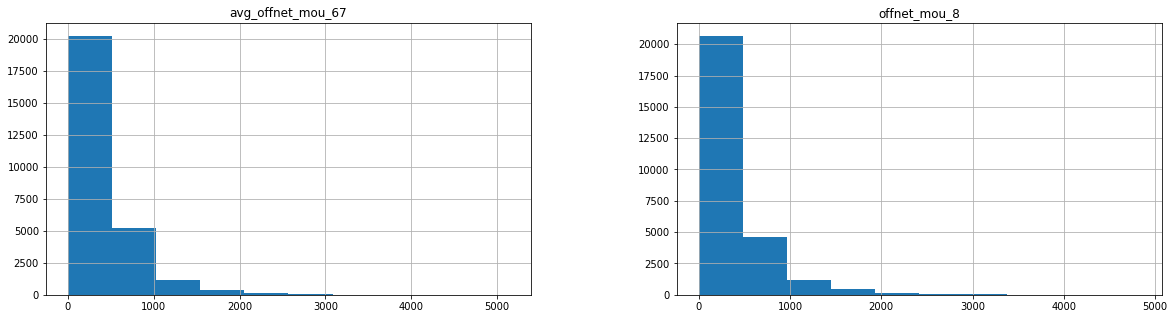

In [38]:
features=['offnet_mou_8','avg_offnet_mou_67']
data_hvc[features].hist(figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C98C719C18>,
      dtype=object)

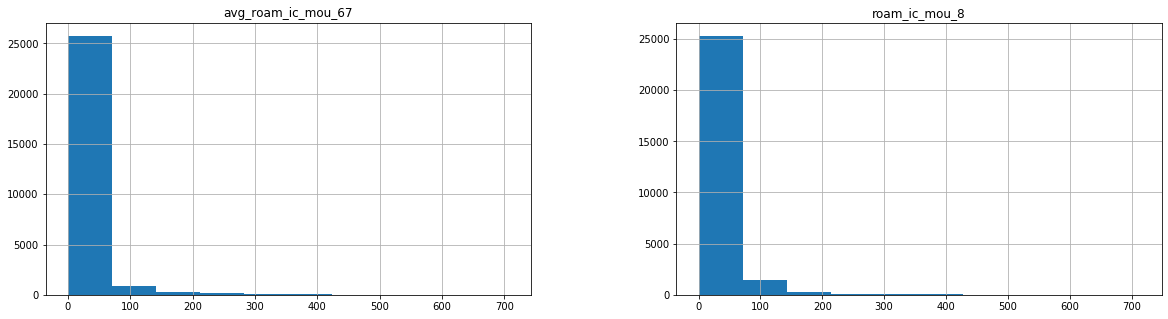

In [39]:
features=['roam_ic_mou_8','avg_roam_ic_mou_67']
data_hvc[features].hist(figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C98C871A58>,
      dtype=object)

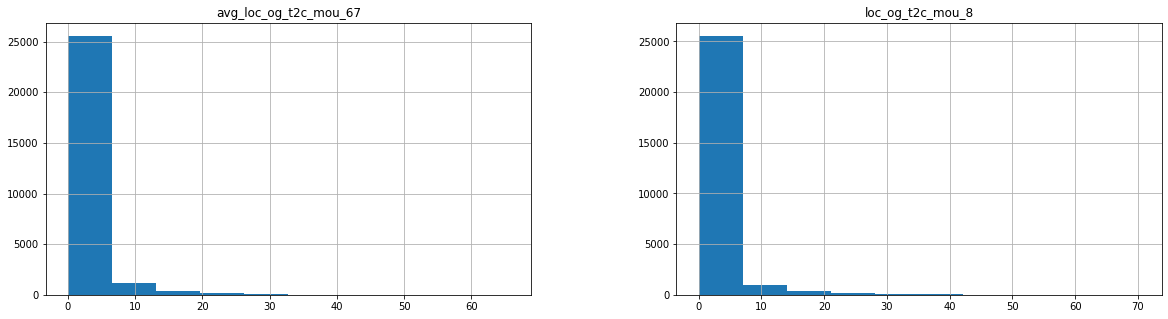

In [40]:
features=['loc_og_t2c_mou_8','avg_loc_og_t2c_mou_67']
data_hvc[features].hist(figsize=(20,5))

#### # As checked mostly all distplot are showing same pattern. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

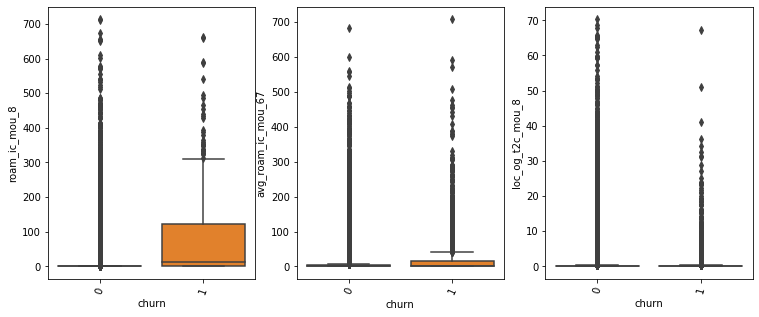

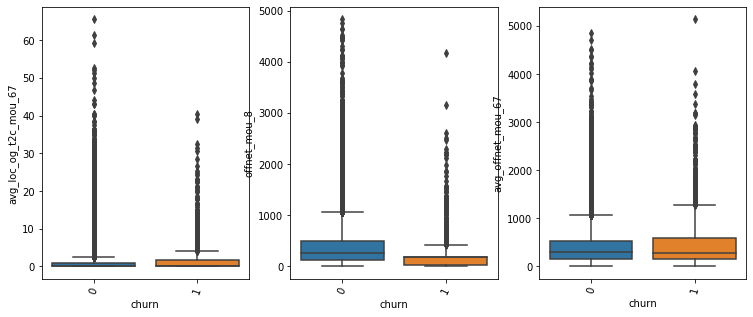

In [41]:
# Checking important variables wrt churn
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['roam_ic_mou_8'])
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['avg_roam_ic_mou_67'])

plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['loc_og_t2c_mou_8'])

plt.xticks(rotation=75)
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['avg_loc_og_t2c_mou_67'])

plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['offnet_mou_8'])

plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['avg_offnet_mou_67'])

plt.xticks(rotation=75)

#### customers with high roam_ic_mou_8 likely to churn


(array([0, 1]), <a list of 2 Text xticklabel objects>)

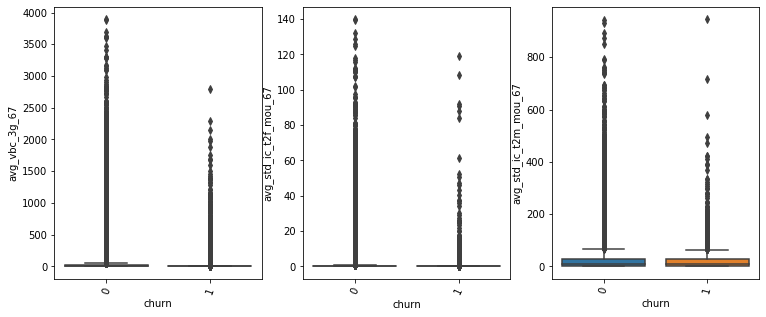

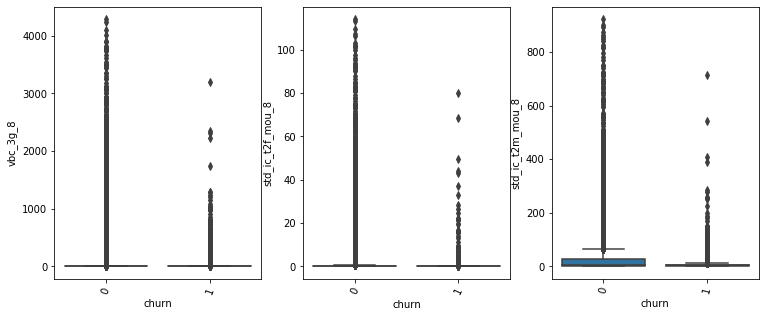

In [42]:
# Checking important variables wrt churn
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['avg_vbc_3g_67'])
plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['avg_std_ic_t2f_mou_67'])

plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['avg_std_ic_t2m_mou_67'])

plt.xticks(rotation=75)
plt.figure(figsize=(26,5))
plt.subplot(1,6,1)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['vbc_3g_8'])

plt.xticks(rotation=70)
plt.subplot(1,6,2)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['std_ic_t2f_mou_8'])

plt.xticks(rotation=65)
plt.subplot(1,6,3)
sns.boxplot(x=data_hvc['churn'],y=data_hvc['std_ic_t2m_mou_8'])

plt.xticks(rotation=75)

In [43]:
data_hvc.columns

Index(['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_6_7', 'churn',
       'avg_std_ic_mou_67', 'avg_total_ic_mou_67', 'avg_spl_ic_mou_67',
       'avg_isd_ic_mou_67', 'avg_ic_others_67', 'avg_total_rech_num_67',
       'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_vol_2g_m

#### not seeing any inferences 

## Modelling

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
data_hvc.columns

Index(['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'avg_rech_6_7', 'churn',
       'avg_std_ic_mou_67', 'avg_total_ic_mou_67', 'avg_spl_ic_mou_67',
       'avg_isd_ic_mou_67', 'avg_ic_others_67', 'avg_total_rech_num_67',
       'avg_max_rech_amt_67', 'avg_last_day_rch_amt_67', 'avg_vol_2g_m

In [46]:
# Putting feature variable to X
X = data_hvc.drop('churn',axis=1)

# Putting response variable to y
y = data_hvc['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.30, random_state=100)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'vbc_3g_8',
       'avg_rech_6_7','avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67',
       'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67',
       'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mo_67',
       'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67',
       'avg_std_ic_t2m_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67']]=scaler.fit_transform(X_train[['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'vbc_3g_8',
       'avg_rech_6_7','avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67',
       'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67',
       'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mo_67',
       'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67',
       'avg_std_ic_t2m_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67']])

X_train.head()

,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avgonnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mo_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_vbc_3g_67,aon_mon
19661,0.155376,3.035647,5.878202,-0.491470,-0.744268,-0.378914,-0.303418,-0.802451,-0.450743,-0.469046,-0.208521,-0.617882,-0.456188,-0.983093,-0.600780,-0.800032,-0.413860,-0.365412,-0.429271,-0.246666,-0.504538,-0.955215,-0.247067,-0.213992,-0.219711,-0.104356,0.440796,2.445691,-0.762472,0.429677,5.706612,-0.319940,-0.349957,5.539543,-0.186553,7.094148,220.44,32.04,0.00,0.176280,-0.356842,-0.903177,-0.117712,0.095135,0.145164,-0.397936,1.156327,-0.960872,1.154160,-0.206779,2.637476,-0.348200,0.702115,-0.232988,-0.506668,0.465543,6.596244,8.049719,-0.507420,-0.566920,-0.329835,1.832496,-0.498821,-0.468469,-0.133079,-0.663425,0.438665,-0.356227,-1.032196,-0.623302,-0.786799,-0.405449,-0.026158,-0.460790,0.513578,0.031178,-1.087262
35869,-0.421555,2.488753,3.224849,-0.256023,-0.744268,-0.378914,-0.290382,-0.671153,-0.235196,-0.469046,-0.208521,-0.475657,-0.456188,-0.983093,-0.121660,-0.436861,-0.413860,-0.046667,-0.346937,-0.246666,-0.504538,-0.955215,-0.247067,-0.213992,-0.219711,-1.120106,-1.355366,-1.092520,-0.762472,-0.284779,-0.351705,-0.319940,-0.349957,-0.303250,-0.186553,-0.343079,0.00,0.00,0.00,-0.411065,-0.167784,-0.152437,1.701657,-0.243013,-0.275679,-0.337070,-0.428345,0.096029,-0.337807,-0.302677,-0.382276,-0.003200,-0.339728,1.048177,-0.339418,0.996798,-0.312720,-0.337783,-0.458932,-0.396539,-0.363195,0.158026,-0.313209,1.370857,-0.234680,0.736341,0.364839,-0.356227,0.422049,-0.387717,0.053234,0.204578,-0.256302,-0.046427,-0.244545,-0.362070,-0.772791
87671,1.863527,-0.293341,-0.317866,-0.288231,-0.665767,-0.378914,2.550916,-0.640630,-0.450743,2.496284,-0.208521,1.356956,1.423963,0.963537,-0.356782,-0.734514,-0.413860,-0.365412,-0.396839,-0.246666,-0.479186,-0.816139,-0.247067,-0.213992,-0.219711,0.008506,0.455051,0.527981,0.911179,11.860836,-0.351705,2.576062,0.874716,-0.303250,-0.186553,-0.343079,0.00,0.00,0.00,-0.287413,-0.562685,-0.983512,-0.438777,-0.243013,-0.275679,0.210723,0.251905,0.034162,8.471867,-0.387841,2.637476,2.411796,-0.339728,-0.232988,-0.662025,0.154164,-0.165559,-0.168833,-0.475895,-0.764979,-0.413235,-0.386441,-0.530587,0.649759,-0.234680,0.089357,-0.230905,-0.356227,-0.376274,-0.564963,-0.787831,-0.437416,-0.416086,-0.462659,-0.244545,-0.362070,-0.622214
28277,0.031977,-0.293341,-0.317866,0.306122,0.314481,5.517816,-0.303418,0.651961,-0.450743,-0.466078,-0.208521,-0.615905,4.066166,-0.147899,0.687007,0.135374,0.549312,-0.365412,-0.374531,-0.147356,-0.452360,0.373863,-0.247067,0.723799,-0.219711,-0.217217,0.074911,0.690738,1.367629,-0.142872,2.247050,-0.319940,-0.349957,3.591945,2.092336,1.003766,781.96,2.47,0.00,1.547267,-0.573360,0.323897,-0.438777,0.348327,-0.137244,-0.519668,0.661600,0.250698,-0.264586,1.825188,-0.382276

In [49]:
X_test[['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'vbc_3g_8',
       'avg_rech_6_7','avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67',
       'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67',
       'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mo_67',
       'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67',
       'avg_std_ic_t2m_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67']]=scaler.transform(X_test[['offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_mon', 'vbc_3g_8',
       'avg_rech_6_7','avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67',
       'avg_loc_og_t2c_mou_67', 'avg_std_og_t2t_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67',
       'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_total_og_mou_67',
       'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mo_67',
       'avg_loc_ic_t2f_mou_67', 'avg_std_ic_t2t_mou_67',
       'avg_std_ic_t2m_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_vbc_3g_67']])



In [50]:
#class imbalance
100*y_train.value_counts(normalize=True)

0    91.163985
1     8.836015
Name: churn, dtype: float64

In [51]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19081
Model:                            GLM   Df Residuals:                    19004
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3339.4
Date:                Mon, 18 May 2020   Deviance:                       6678.8
Time:                        22:34:32   Pearson chi2:                 1.01e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4408      0.069    -49.897      0.000      -3.576      -3.306
offnet_mou_8               -1.4758      0.543     -2.715      0.007      -2.541      -0.411
roam_ic_mou_8              -0.0155      0.040     -0.390      0.697      -0.094       0.063
roam_og_mou_8               0.2877      0.074      3.892      0.000       0.143       0.433
loc_og_t2t_mou_8         6003.8759   1046.192      5.739      0.000    3953.377    8054.375
loc_og_t2m_mou_8         8130.5559   1416.628      5.739      0.000    5354.017    1.09e+04
loc_og_t2f_mou_8          561.4753     97.807      5.741      0.000     369.777     753.173
loc_og_t2c_mou_8            0.0530      0.050      1.058      0.290      -0.045       0.151
loc_og_mou_8            -1.149e+04   2001.544     -5.740      0.000   -1.54e+04   -7565.440
std_og_t2t_mou_8         1.048e+04   3077.166      3.406      0.001    4448.877    1.65e+04
std_og_t2m_mou_8         1.037e+04   3043.487      3.406      0.001    4401.500    1.63e+04
std_og_t2f_mou_8          156.0497     45.818      3.406      0.001      66.248     245.852
std_og_mou_8            -1.557e+04   4569.972     -3.406      0.001   -2.45e+04   -6609.736
spl_og_mou_8               -0.0716      0.089     -0.803      0.422      -0.246       0.103
total_og_mou_8              2.4486      3.298      0.743      0.458      -4.015       8.912
loc_ic_t2t_mou_8          206.5903    101.573      2.034      0.042       7.511     405.669
loc_ic_t2m_mou_8          387.6575    190.862      2.031      0.042      13.575     761.740
loc_ic_t2f_mou_8           63.9618     31.458      2.033      0.042       2.305     125.619
std_ic_t2t_mou_8         -397.3863    249.320     -1.594      0.111    -886.045      91.272
std_ic_t2m_mou_8         -746.1525    468.511     -1.593      0.111   -1664.417     172.112
std_ic_t2f_mou_8          -90.3484     56.675     -1.594      0.111    -201.430      20.733
std_ic_mou_8             1111.0397    675.026      1.646      0.100    -211.987    2434.066
total_ic_mou_8           -575.1272    282.271     -2.038      0.042   -1128.368     -21.887
spl_ic_mou_8               -0.2895      0.144     -2.013      0.044      -0.571      -0.008
isd_ic_mou_8               68.3726     33.583      2.036      0.042       2.551     134.194
ic_others_8                 6.5624      3.206      2.047      0.041       0.278      12.847
total_rech_num_8           -0.3406      0.082     -4.147      0.000      -0.501      -0.180
total_rech_amt_8           -0.1176      0.124     -0.949      0.343      -0.360       0.125
max_rech_amt_8              0.1629      0.065      2.523      0.012       0.036       0.289
last_day_rch_amt_8         -0.5522      0.067     -8.233      0.000      -0.684      -0.421
vol_2g_mb_8                -0.1303      0.080  

In [52]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import time



# specify number of folds for k-fold CV
C=np.logspace(-5,8,15)
dual=[True,False]
max_iter=[100,110,120,130,140,150,160]

param_grid=dict(dual=dual,max_iter=max_iter,C=C)
# parameters to build the model on
# parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
logregg1 = LogisticRegression(penalty='l2',random_state=100)


# fit tree on training data
logreg_cv = GridSearchCV(logregg1, param_grid, 
                    cv=3, n_jobs=-1)

start_time=time.time()
random_result=logreg_cv.fit(X_train, y_train)

print('Best: %f using %s' % (random_result.best_score_,random_result.best_params_))
print('Execution time: ' + str((time.time()-start_time))+'seconds')

Best: 0.933809 using {'C': 268.2695795279727, 'dual': False, 'max_iter': 100}
Execution time: 251.92670607566833seconds


In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced',dual=False,max_iter=100,penalty='l2',C=268.2695795279727,solver='saga',random_state=100,n_jobs=-1 )

In [56]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [57]:
from sklearn import metrics
from sklearn.metrics import classification_report

y_predd=rfe.predict(X_test)
print('Accuracy :  {}'.format(metrics.accuracy_score(y_test,y_predd)))
print('Sensitivity :  {}'.format(metrics.recall_score(y_test,y_predd)))
print (classification_report(y_test,y_predd))

Accuracy :  0.8319882611885546
Sensitivity :  0.8207282913165266
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7464
           1       0.32      0.82      0.46       714

    accuracy                           0.83      8178
   macro avg       0.65      0.83      0.68      8178
weighted avg       0.92      0.83      0.86      8178



In [ ]:
# pd.concat((pd.DataFrame(X.columns,columns=['Variable']),
#            pd.DataFrame(logreg_cv.feature_importances_,columns=['importance'])),axis=1).sort_values(by='importance',ascending=False)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('offnet_mou_8', False, 15),
 ('roam_ic_mou_8', False, 13),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 24),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 44),
 ('loc_og_t2c_mou_8', False, 32),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 22),
 ('std_og_t2m_mou_8', False, 38),
 ('std_og_t2f_mou_8', False, 30),
 ('std_og_mou_8', True, 1),
 ('spl_og_mou_8', False, 33),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 20),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 8),
 ('std_ic_t2t_mou_8', False, 4),
 ('std_ic_t2m_mou_8', False, 42),
 ('std_ic_t2f_mou_8', False, 54),
 ('std_ic_mou_8', False, 11),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 46),
 ('ic_others_8', False, 50),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 9),
 ('max_rech_amt_8', False, 56),
 ('last_day_rch_amt_8', True, 1),
 ('vol_2g_mb_8', False, 10),
 ('vol_3g_mb_8', False, 6),
 ('monthly_2g_8', True,

In [59]:
col = X_train.columns[rfe.support_]

In [61]:
X_train.columns[~rfe.support_]


Index(['offnet_mou_8', 'roam_ic_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'sachet_2g_8', 'sachet_3g_8', 'vbc_3g_8', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'avg_std_ic_mou_67', 'avg_total_ic_mou_67',
       'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67',
       'avg_total_rech_num_67', 'avg_max_rech_amt_67',
       'avg_last_day_rch_amt_67', 'avg_vol_2g_mb_67', 'avg_vol_3g_mb_67',
       'avg_monthly_2g_67', 'avg_sachet_2g_67', 'avg_monthly_3g_67',
       'avg_sachet_3g_67', 'avgonnet_mou_67', 'avg_offnet_mou_67',
       'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2t_mou_67',
       'avg_loc_og_t2m

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19081
Model:                            GLM   Df Residuals:                    19065
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3510.7
Date:                Mon, 18 May 2020   Deviance:                       7021.4
Time:                        22:43:46   Pearson chi2:                 2.86e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.9494      0.072    -54.672      0.000      -4.091      -3.808
roam_og_mou_8            0.1751      0.027      6.511      0.000       0.122       0.228
loc_og_t2m_mou_8        -0.3774      0.170     -2.222      0.026      -0.710      -0.044
loc_og_mou_8             4.4849      0.415     10.799      0.000       3.671       5.299
std_og_mou_8             8.5334      0.746     11.439      0.000       7.071       9.995
total_og_mou_8          -9.5794      0.812    -11.794      0.000     -11.171      -7.988
loc_ic_t2m_mou_8        -0.7887      0.198     -3.986      0.000      -1.176      -0.401
total_ic_mou_8          -0.7959      0.149     -5.359      0.000      -1.087      -0.505
spl_ic_mou_8            -0.5160      0.086     -6.006      0.000      -0.684      -0.348
total_rech_num_8        -0.4955      0.057     -8.648      0.000      -0.608      -0.383
last_day_rch_amt_8      -0.6078      0.062     -9.740      0.000      -0.730      -0.485
monthly_2g_8            -0.5632      0.076     -7.445      0.000      -0.711      -0.415
monthly_3g_8            -0.7222      0.081     -8.861      0.000      -0.882      -0.562
avg_rech_6_7             0.4312      0.035     12.147      0.000       0.362       0.501
avg_loc_ic_t2m_mo_67     0.3505      0.060      5.860      0.000       0.233       0.468
aon_mon                 -0.2823      0.041     -6.869      0.000      -0.363      -0.202
========================================================================================
"""

In [63]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

19661    0.022478
35869    0.875907
87671    0.007135
28277    0.000259
29940    0.176936
85901    0.039514
71352    0.000050
7389     0.099532
56046    0.000075
23595    0.041880
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.24779952e-02, 8.75907414e-01, 7.13528561e-03, 2.59419409e-04,
       1.76935842e-01, 3.95137381e-02, 4.96879868e-05, 9.95321408e-02,
       7.49279071e-05, 4.18796915e-02])

In [ ]:
##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [65]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.022478,19661
1,1,0.875907,35869
2,0,0.007135,87671
3,0,0.000259,28277
4,1,0.176936,29940


In [ ]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [66]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.022478,19661,0
1,1,0.875907,35869,1
2,0,0.007135,87671,0
3,0,0.000259,28277,0
4,1,0.176936,29940,0


In [67]:
from sklearn import metrics

In [68]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[17227   168]
 [ 1108   578]]


In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9331271945914784


In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_8,791.91
3,std_og_mou_8,677.81
2,loc_og_mou_8,206.07
5,loc_ic_t2m_mou_8,6.76
6,total_ic_mou_8,4.77
1,loc_og_t2m_mou_8,4.56
13,avg_loc_ic_t2m_mo_67,3.14
0,roam_og_mou_8,1.46
12,avg_rech_6_7,1.43
8,total_rech_num_8,1.41


In [72]:
col = col.drop('total_og_mou_8', 1)
col

Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'loc_ic_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8', 'avg_rech_6_7', 'avg_loc_ic_t2m_mo_67', 'aon_mon'],
      dtype='object')

In [73]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19081
Model:                            GLM   Df Residuals:                    19066
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3584.5
Date:                Mon, 18 May 2020   Deviance:                       7168.9
Time:                        22:44:41   Pearson chi2:                 4.24e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.0300      0.072    -55.974      0.000      -4.171      -3.889
roam_og_mou_8            0.3528      0.022     15.785      0.000       0.309       0.397
loc_og_t2m_mou_8        -0.7786      0.151     -5.159      0.000      -1.074      -0.483
loc_og_mou_8            -0.1082      0.116     -0.934      0.350      -0.335       0.119
std_og_mou_8            -0.2299      0.052     -4.441      0.000      -0.331      -0.128
loc_ic_t2m_mou_8         0.3230      0.176      1.838      0.066      -0.021       0.667
total_ic_mou_8          -1.6171      0.163     -9.945      0.000      -1.936      -1.298
spl_ic_mou_8            -0.5329      0.086     -6.161      0.000      -0.702      -0.363
total_rech_num_8        -0.7185      0.059    -12.258      0.000      -0.833      -0.604
last_day_rch_amt_8      -0.7455      0.065    -11.404      0.000      -0.874      -0.617
monthly_2g_8            -0.5890      0.077     -7.623      0.000      -0.740      -0.438
monthly_3g_8            -0.6370      0.077     -8.236      0.000      -0.789      -0.485
avg_rech_6_7             0.3766      0.035     10.698      0.000       0.308       0.446
avg_loc_ic_t2m_mo_67     0.2680      0.056      4.779      0.000       0.158       0.378
aon_mon                 -0.3012      0.040     -7.466      0.000      -0.380      -0.222
========================================================================================
"""

In [74]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [75]:
y_train_pred[:10]

array([9.58968706e-02, 7.77556659e-01, 8.21265440e-03, 4.74034770e-04,
       1.40724339e-01, 3.28260182e-02, 3.37300992e-05, 8.61317738e-02,
       4.24270858e-05, 4.70175779e-02])

In [76]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [77]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.095897,19661,0
1,1,0.777557,35869,1
2,0,0.008213,87671,0
3,0,0.000474,28277,0
4,1,0.140724,29940,0


In [78]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9323934804255543


In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_t2m_mou_8,6.67
5,total_ic_mou_8,4.68
1,loc_og_t2m_mou_8,4.55
2,loc_og_mou_8,4.38
12,avg_loc_ic_t2m_mo_67,3.14
3,std_og_mou_8,1.54
11,avg_rech_6_7,1.42
7,total_rech_num_8,1.35
8,last_day_rch_amt_8,1.22
13,aon_mon,1.13


In [80]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('loc_og_mou_8')
col

Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'avg_rech_6_7',
       'avg_loc_ic_t2m_mo_67', 'aon_mon'],
      dtype='object')

In [81]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19081
Model:                            GLM   Df Residuals:                    19067
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3585.0
Date:                Mon, 18 May 2020   Deviance:                       7169.9
Time:                        22:45:08   Pearson chi2:                 4.73e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.0299      0.072    -55.964      0.000      -4.171      -3.889
roam_og_mou_8            0.3514      0.022     15.760      0.000       0.308       0.395
loc_og_t2m_mou_8        -0.8706      0.115     -7.584      0.000      -1.096      -0.646
std_og_mou_8            -0.2261      0.052     -4.388      0.000      -0.327      -0.125
loc_ic_t2m_mou_8         0.3311      0.176      1.884      0.060      -0.013       0.676
total_ic_mou_8          -1.6403      0.161    -10.200      0.000      -1.955      -1.325
spl_ic_mou_8            -0.5315      0.086     -6.150      0.000      -0.701      -0.362
total_rech_num_8        -0.7207      0.059    -12.309      0.000      -0.835      -0.606
last_day_rch_amt_8      -0.7478      0.065    -11.449      0.000      -0.876      -0.620
monthly_2g_8            -0.5882      0.077     -7.616      0.000      -0.740      -0.437
monthly_3g_8            -0.6359      0.077     -8.220      0.000      -0.787      -0.484
avg_rech_6_7             0.3765      0.035     10.696      0.000       0.307       0.445
avg_loc_ic_t2m_mo_67     0.2710      0.056      4.832      0.000       0.161       0.381
aon_mon                 -0.3016      0.040     -7.473      0.000      -0.381      -0.222
========================================================================================
"""

In [82]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [83]:
y_train_pred[:10]

array([9.52420074e-02, 7.79605710e-01, 8.27707306e-03, 4.89928235e-04,
       1.40398134e-01, 3.24698944e-02, 3.39755866e-05, 8.57532473e-02,
       4.07559309e-05, 4.67703624e-02])

In [84]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [85]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.095242,19661,0
1,1,0.779606,35869,1
2,0,0.008277,87671,0
3,0,0.000490,28277,0
4,1,0.140398,29940,0


In [86]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9321314396520098


In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_t2m_mou_8,6.50
4,total_ic_mou_8,4.30
11,avg_loc_ic_t2m_mo_67,3.14
1,loc_og_t2m_mou_8,1.73
2,std_og_mou_8,1.51
10,avg_rech_6_7,1.41
6,total_rech_num_8,1.35
7,last_day_rch_amt_8,1.21
12,aon_mon,1.13
9,monthly_3g_8,1.12


In [88]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('loc_ic_t2m_mou_8')
col

Index(['roam_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'avg_rech_6_7', 'avg_loc_ic_t2m_mo_67',
       'aon_mon'],
      dtype='object')

In [89]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19081
Model:                            GLM   Df Residuals:                    19068
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3586.7
Date:                Mon, 18 May 2020   Deviance:                       7173.4
Time:                        22:45:33   Pearson chi2:                 6.00e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.0420      0.072    -55.969      0.000      -4.184      -3.900
roam_og_mou_8            0.3638      0.021     17.153      0.000       0.322       0.405
loc_og_t2m_mou_8        -0.8156      0.110     -7.393      0.000      -1.032      -0.599
std_og_mou_8            -0.2229      0.052     -4.318      0.000      -0.324      -0.122
total_ic_mou_8          -1.4310      0.110    -12.952      0.000      -1.648      -1.214
spl_ic_mou_8            -0.5321      0.086     -6.157      0.000      -0.702      -0.363
total_rech_num_8        -0.7355      0.058    -12.609      0.000      -0.850      -0.621
last_day_rch_amt_8      -0.7620      0.065    -11.707      0.000      -0.890      -0.634
monthly_2g_8            -0.5902      0.077     -7.622      0.000      -0.742      -0.438
monthly_3g_8            -0.6287      0.077     -8.162      0.000      -0.780      -0.478
avg_rech_6_7             0.3668      0.035     10.537      0.000       0.299       0.435
avg_loc_ic_t2m_mo_67     0.3108      0.053      5.912      0.000       0.208       0.414
aon_mon                 -0.3038      0.040     -7.540      0.000      -0.383      -0.225
========================================================================================
"""

In [90]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [91]:
y_train_pred[:10]

array([1.04674736e-01, 7.73369666e-01, 8.08744833e-03, 5.06338704e-04,
       1.48775962e-01, 3.21369988e-02, 3.19589826e-05, 9.11213065e-02,
       3.21176193e-05, 4.67885035e-02])

In [92]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [93]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.104675,19661,0
1,1,0.773370,35869,1
2,0,0.008087,87671,0
3,0,0.000506,28277,0
4,1,0.148776,29940,0


In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9324458885802631


In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_ic_mou_8,2.32
10,avg_loc_ic_t2m_mo_67,2.20
1,loc_og_t2m_mou_8,1.62
2,std_og_mou_8,1.51
9,avg_rech_6_7,1.39
5,total_rech_num_8,1.35
6,last_day_rch_amt_8,1.21
11,aon_mon,1.13
0,roam_og_mou_8,1.11
8,monthly_3g_8,1.11


In [97]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[17187,   208],
       [ 1081,   605]], dtype=int64)

In [98]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9324458885802631

In [99]:
print (classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     17395
           1       0.74      0.36      0.48      1686

    accuracy                           0.93     19081
   macro avg       0.84      0.67      0.72     19081
weighted avg       0.92      0.93      0.92     19081



In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.35883748517200476

In [102]:
# Let us calculate specificity
TN / float(TN+FP)

0.988042540960046

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

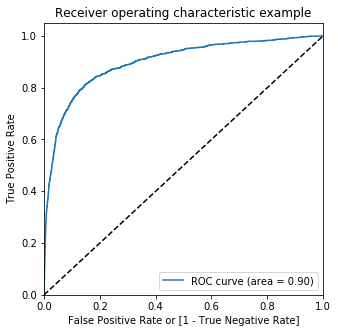

In [105]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.104675,19661,0,1,1,0,0,0,0,0,0,0,0
1,1,0.773370,35869,1,1,1,1,1,1,1,1,1,0,0
2,0,0.008087,87671,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000506,28277,0,1,0,0,0,0,0,0,0,0,0
4,1,0.148776,29940,0,1,1,0,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.088360  1.000000  0.000000
0.1   0.1  0.838635  0.821471  0.840299
0.2   0.2  0.904827  0.702254  0.924461
0.3   0.3  0.925947  0.615065  0.956079
0.4   0.4  0.931503  0.461447  0.977062
0.5   0.5  0.932446  0.358837  0.988043
0.6   0.6  0.931345  0.301305  0.992412
0.7   0.7  0.924375  0.184460  0.996091
0.8   0.8  0.916095  0.062871  0.998793
0.9   0.9  0.912845  0.019573  0.999425


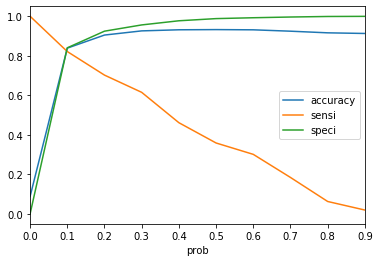

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.104675,19661,0,1,1,0,0,0,0,0,0,0,0,1
1,1,0.773370,35869,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.008087,87671,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000506,28277,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.148776,29940,0,1,1,0,0,0,0,0,0,0,0,1


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.838635291651381

In [111]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[14617,  2778],
       [  301,  1385]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8214709371293001

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.8402989364759988

In [115]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15970106352400115


In [116]:
# Positive predictive value 
print (TP / float(TP+FP))

0.3326927696372808


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9798230325780936


Precision
TP / TP + FP

In [118]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.3326927696372808

In [119]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]) #recall

0.8214709371293001

### Performing same on test data

In [120]:
X_test = X_test[col]
X_test.head()

,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,monthly_2g_8,monthly_3g_8,avg_rech_6_7,avg_loc_ic_t2m_mo_67,aon_mon
71567,-0.317866,-0.357438,0.566027,-0.159105,-0.247067,-0.330078,-0.762472,-0.319940,-0.30325,-0.259592,-0.283486,2.438496
16914,-0.317866,-0.735530,-0.373545,-0.831844,-0.247067,-1.007245,-0.762472,-0.319940,-0.30325,0.035626,-0.597978,-0.134631
32256,-0.317866,0.399981,-0.615834,-0.302710,-0.247067,1.249978,-0.644133,-0.319940,-0.30325,-0.353876,0.228061,-0.136680
62271,-0.317866,0.692528,-0.617882,0.122481,-0.247067,-0.217217,-0.762472,5.472064,-0.30325,-0.888669,0.123502,0.146036
9543,3.614847,-0.513112,-0.145415,-0.780311,-0.247067,-0.668661,0.454729,2.576062,-0.30325,1.675556,-0.470757,-0.855762


In [121]:
X_test_sm = sm.add_constant(X_test)

In [122]:
y_test_pred = res.predict(X_test_sm)

In [123]:
y_test_pred[:10]

71567    0.033763
16914    0.358194
32256    0.020871
62271    0.000704
9543     0.184782
25551    0.001676
7957     0.005715
992      0.000041
55800    0.696217
24257    0.041254
dtype: float64

In [124]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
71567,0.033763
16914,0.358194
32256,0.020871
62271,0.000704
9543,0.184782


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
y_pred_final.head()

,churn,CustID,0
0,0,71567,0.033763
1,0,16914,0.358194
2,0,32256,0.020871
3,0,62271,0.000704
4,0,9543,0.184782


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [131]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,CustID,Churn_Prob
0,0,71567,0.033763
1,0,16914,0.358194
2,0,32256,0.020871
3,0,62271,0.000704
4,0,9543,0.184782


In [132]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [133]:
y_pred_final.head()

,churn,CustID,Churn_Prob,final_predicted
0,0,71567,0.033763,0
1,0,16914,0.358194,1
2,0,32256,0.020871,0
3,0,62271,0.000704,0
4,0,9543,0.184782,1


In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8390804597701149

In [135]:
confusion3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion3

array([[6285, 1179],
       [ 137,  577]], dtype=int64)

In [136]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8081232492997199

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.8420418006430869

### Resultts:

- Train : Accuracy-0.838          specificity-0.840       sensitivity-0.821
- Test  : Accuracy-0.839      specificity- 0.842       sensitivity-0.808

### Top Features : roam_og_mou_8,loc_ic_t2t_mou_8,aon_mon